## Load dependences and setting output configuration

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [3]:
datapath = 'F:/1_GTCG/data/20_04_18/unpacked/' 
germline_cube = np.load(datapath + 'germline.npy')
somatic_cube = np.load(datapath + 'somatic.npy')
noSV_cube = np.load(datapath + 'noSV.npy')

germline_labels = np.load(datapath + 'germline_label.npy')
somatic_labels = np.load(datapath + 'somatic_label.npy')
noSV_labels = np.load(datapath + 'noSV_label.npy')

### Find  the indexes that split the categories

In [7]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [8]:
find_splitting_indices(germline_labels)

4874 :  DEL_start DEL_end
9737 :  DEL_end INS_pos


In [9]:
find_splitting_indices(somatic_labels)

4849 :  DEL_start DEL_end
9677 :  DEL_end INS_pos


In [10]:
find_splitting_indices(noSV_labels)

### Check sizes of arrays

In [11]:
qube_size = germline_cube.shape[0]
                            
germline_cube.shape

(19936, 22, 50)

In [12]:
somatic_cube.shape

(19468, 22, 50)

In [13]:
germline_labels.shape

(19936,)

In [14]:
somatic_labels.shape

(19468,)

In [16]:
print(germline_cube[:,4][1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  877    0    0    0    0 7821    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]


In [23]:
noSV_cube.shape

(20717, 22, 50)

## Split into training, validation and test datasets

From the germline set 

-- there will be 4000 training, 1000 validation and 1249 test windows for ´start of deletions´.

-- there will be 4000 training, 1000 validation and 1272 test windows for ´end of deletions´. 

For insertions the numbers are 8000, 2000, 1861. 
 



I decided to hardcode the following values because this way they are easier to read. 

In [17]:
g_del_st = 4874
g_del_end = 9737
s_del_st = 4849
s_del_end = 9677

In [18]:
n_train = 3000
n_val = 1000

In [20]:
X_train_germline = np.concatenate((germline_cube[0:n_train], germline_cube[g_del_st:g_del_st+n_train],  germline_cube[g_del_end:g_del_end+2*n_train]),axis=0)
y_train_germline = np.concatenate((germline_labels[0:n_train], germline_labels[g_del_st:g_del_st+n_train],  germline_labels[g_del_end:g_del_end+2*n_train]),axis=0)
X_val_germline = np.concatenate((germline_cube[n_train:n_train + n_val], germline_cube[g_del_st+n_train:g_del_st+n_train+n_val],  germline_cube[g_del_end+2*n_train:g_del_end+2*n_train+2*n_val]),axis=0)
y_val_germline = np.concatenate((germline_labels[n_train:n_train + n_val], germline_labels[g_del_st+n_train:g_del_st+n_train+n_val],  germline_labels[g_del_end+2*n_train:g_del_end+2*n_train+2*n_val]),axis=0)
X_test_germline = np.concatenate((germline_cube[n_train + n_val:g_del_st], germline_cube[g_del_st+n_train+n_val:g_del_end],  germline_cube[g_del_end+2*n_train+2*n_val:]),axis=0)
y_test_germline = np.concatenate((germline_labels[n_train + n_val:g_del_st], germline_labels[g_del_st+n_train+n_val:g_del_end],  germline_labels[g_del_end+2*n_train+2*n_val:]),axis=0)

Repeat the same for the somatic

In [21]:
X_train_somatic = np.concatenate((somatic_cube[0:n_train], somatic_cube[s_del_st:s_del_st+n_train],  somatic_cube[s_del_end:s_del_end+2*n_train]),axis=0)
y_train_somatic = np.concatenate((somatic_labels[0:n_train], somatic_labels[s_del_st:s_del_st+n_train],  somatic_labels[s_del_end:s_del_end+2*n_train]),axis=0)
X_val_somatic = np.concatenate((somatic_cube[n_train:n_train + n_val], somatic_cube[s_del_st+n_train:s_del_st+n_train+n_val],  somatic_cube[s_del_end+2*n_train:s_del_end+2*n_train+2*n_val]),axis=0)
y_val_somatic = np.concatenate((somatic_labels[n_train:n_train + n_val], somatic_labels[s_del_st+n_train:s_del_st+n_train+n_val],  somatic_labels[s_del_end+2*n_train:s_del_end+2*n_train+2*n_val]),axis=0)
X_test_somatic = np.concatenate((somatic_cube[n_train + n_val:s_del_st], somatic_cube[s_del_st+n_train+n_val:s_del_end],  somatic_cube[s_del_end+2*n_train+2*n_val:]),axis=0)
y_test_somatic = np.concatenate((somatic_labels[n_train + n_val:s_del_st], somatic_labels[s_del_st+n_train+n_val:s_del_end],  somatic_labels[s_del_end+2*n_train+2*n_val:]) ,axis=0)

Repeat the same for noSV

In [25]:
X_train_noSV= noSV_cube[0:4*n_train]
y_train_noSV =noSV_labels[0:4*n_train] 
X_val_noSV= noSV_cube[4*n_train:4*n_train+4*n_val]
y_val_noSV =noSV_labels[4*n_train:4*n_train+4*n_val] 
X_test_noSV= noSV_cube[4*n_train+4*n_val:]
y_test_noSV =noSV_labels[4*n_train+4*n_val:] 

Concatenate the previous germline and somatic datasets.

In [26]:
X_train = np.concatenate((X_train_germline, X_train_somatic, X_train_noSV), axis =0)
X_val = np.concatenate((X_val_germline, X_val_somatic, X_val_noSV), axis =0)
X_test = np.concatenate((X_test_germline, X_test_somatic, X_test_noSV), axis =0)
y_train = np.concatenate((y_train_germline, y_train_somatic, y_train_noSV), axis =0)
y_val = np.concatenate((y_val_germline, y_val_somatic, y_val_noSV), axis =0)
y_test = np.concatenate((y_test_germline, y_test_somatic, y_test_noSV), axis =0)

### Number of training, validation and test windows

In [27]:
X_train.shape

(36000, 22, 50)

In [28]:
X_val.shape

(12000, 22, 50)

In [29]:
X_test.shape

(12121, 22, 50)

In [47]:
number_channels = X_train.shape[1]
number_channels

18

In [31]:
maxy_Xtrain = numpy.zeros(shape=(number_channels))

for j in range (0, number_channels):
    maxy_Xtrain[j] = np.amax(X_train[:,j])
    print(maxy_Xtrain[j])


84.0
45.0
53.0
71617570.0
77850559.0
121447748.0
38532122.0
13.0
40.0
4054.0
43700001.0
91.0
42.0
39.0
19206838.0
155700832.0
113763214.0
38533637.0
15.0
33.0
4336.0
755655.0


In [32]:
X_train[:,6]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Normalize data using the reads coverage as parameter

In [33]:
coverage = np.median(X_train[:, 11, :]) #the median of the coverage in the normal cells
coverage

32.0

In [35]:
expected_distance = 150
def normalize(X):       
    for i in range (0, len(X)):                    
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100     
normalize(X_train)
normalize(X_val)
normalize(X_test)

In [36]:
def eliminate_noise_chanels(X):
    return np.delete(X, [3, 6, 14, 17], axis=1)
    

In [40]:
X_train = eliminate_noise_chanels(X_train)
X_val = eliminate_noise_chanels(X_val)
X_test = eliminate_noise_chanels(X_test)

In [41]:
X_train.shape

(36000, 18, 50)

In [48]:
number_channels = X_train.shape[1]
number_channels

18

## Plots several  windows from the germline SV category

In [42]:
n_windows = 30
label = ["None"] * number_channels

In [43]:
label[0] = "tumor:coverage"
label[1] = "tumor:#left clipped reads"
label[2] = "tumor:#right clipped reads"
label[3] = "tumor:sum of distances to mates for forward reads"
label[4] = "tumor:sum of distances to mates for reverse reads"
label[5] = "tumor:#split reads left split"
label[6] = "tumor:#split reads right split"
label[7] = "tumor:sum of gaps for left split reads"
label[8] = "tumor: sum of gaps for right split reads"

In [44]:
label[0+9] = "normal:coverage"
label[1+9] = "normal:#left clipped reads"
label[2+9] = "normal:#right clipped reads"
label[3+9] = "normal:sum of distances to mates for forward reads"
label[4+9] = "normal:sum of distances to mates for reverse reads"
label[5+9] = "normal:#split reads left split"
label[6+9] = "normal:#split reads right split"
label[7+9] = "normal:sum of gaps for left split reads"
label[8+9] = "normal: sum of gaps for right split reads"

In [50]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 5):
        print(y_train[i], 'id:', i)
        print('id:', i)
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 10:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_train[i][j]]  
            #plt.ylim([100,700])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_train[i][j]]  
            if j>10:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 11])
            else:
                plt.plot(Z, label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

DEL_end id: 3990
id: 3990


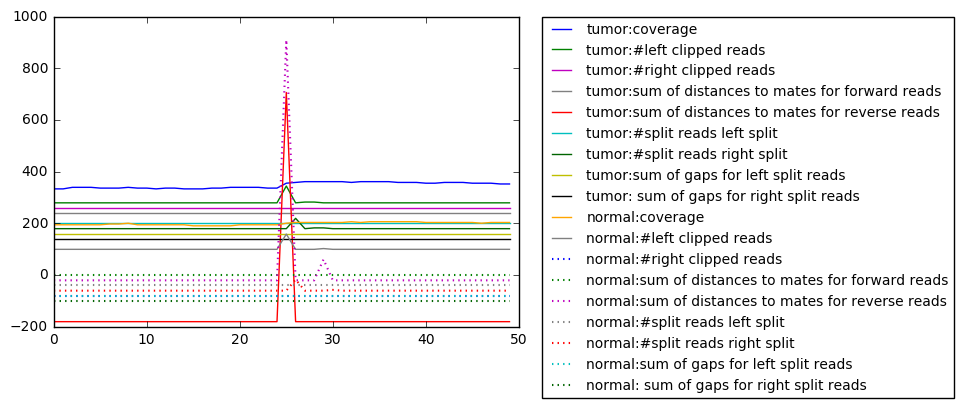

DEL_end id: 3995
id: 3995


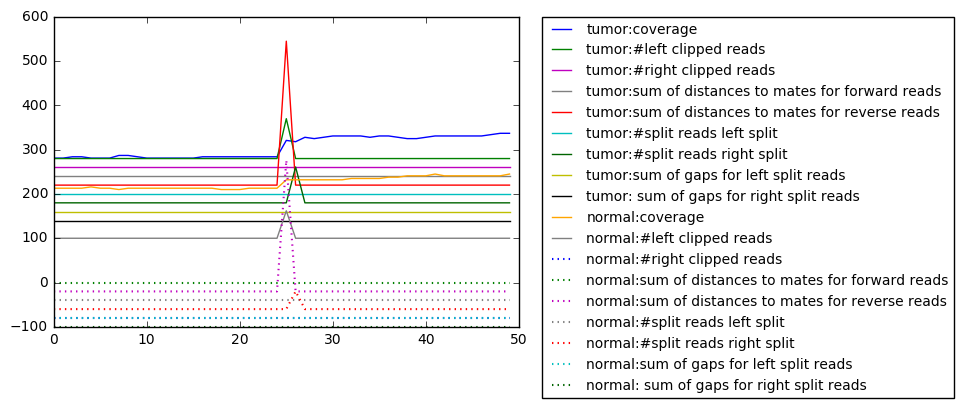

DEL_end id: 4000
id: 4000


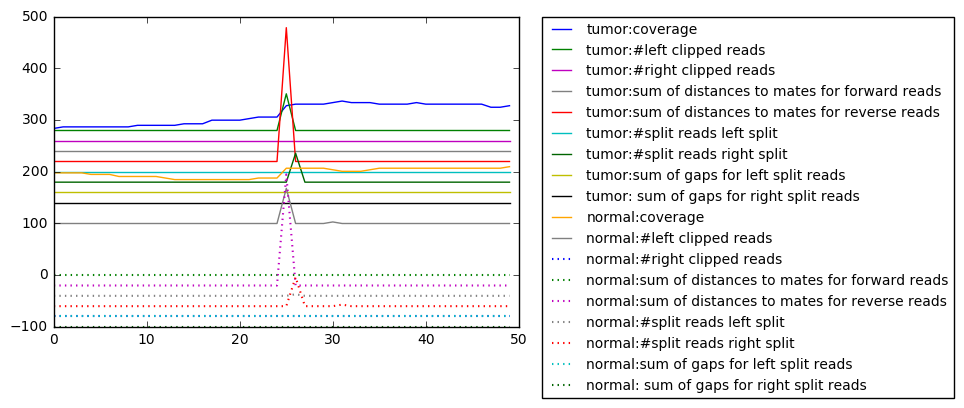

DEL_end id: 4005
id: 4005


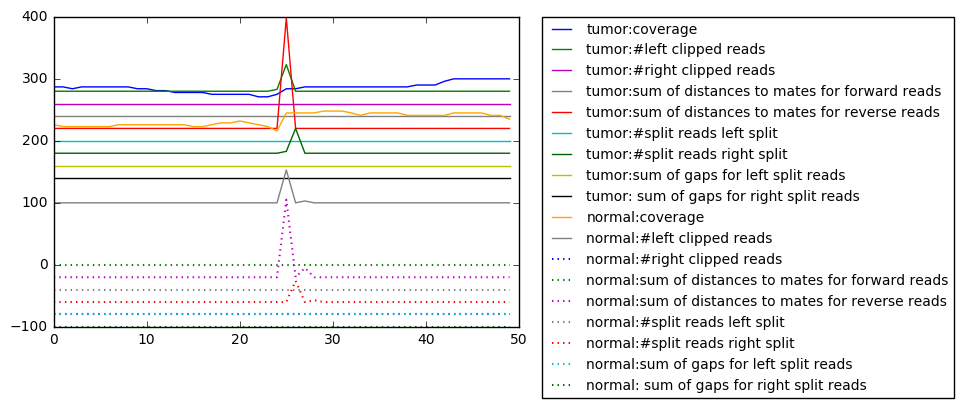

DEL_end id: 4010
id: 4010


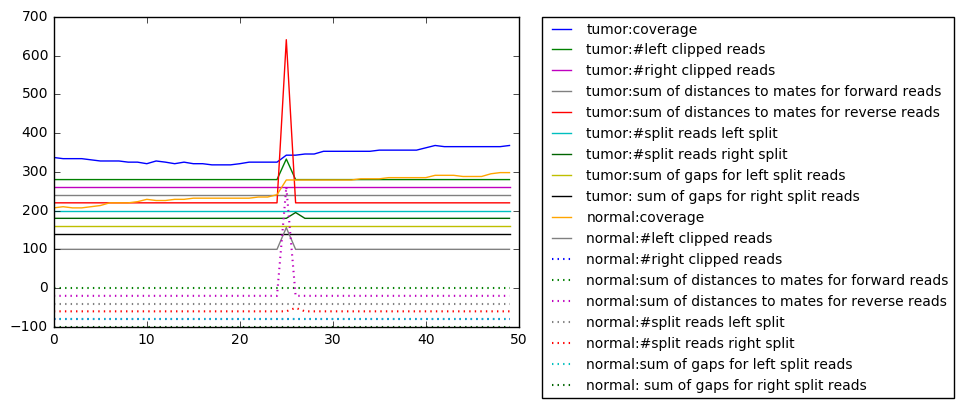

DEL_end id: 4015
id: 4015


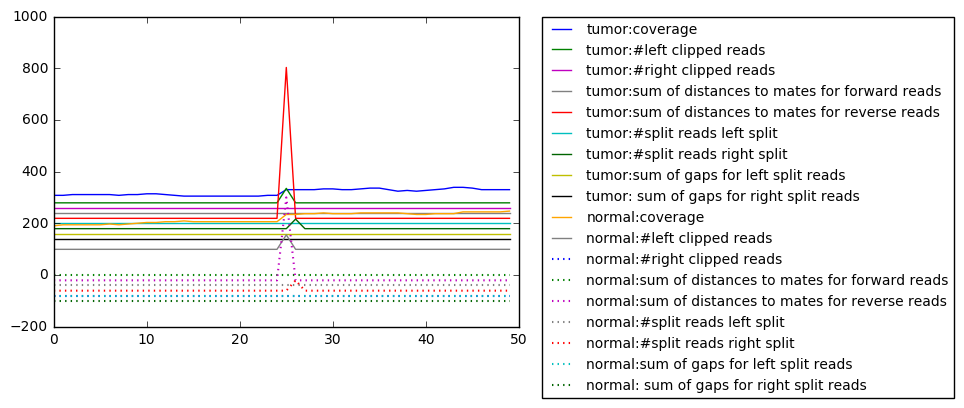

In [51]:
start_window = 3990
plot_channels(start_window, n_windows)

INS_pos id: 7985
id: 7985


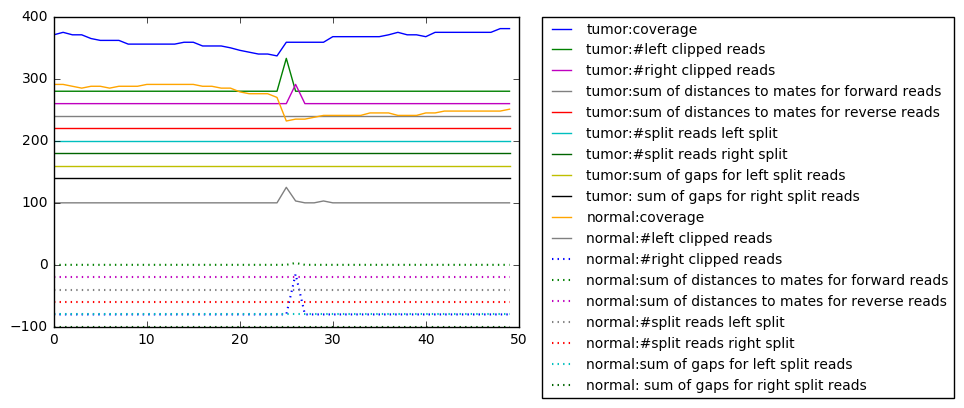

INS_pos id: 7990
id: 7990


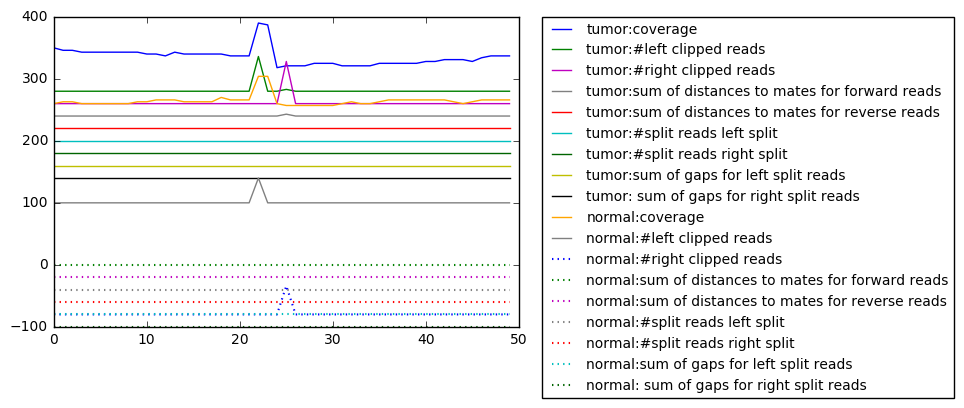

INS_pos id: 7995
id: 7995


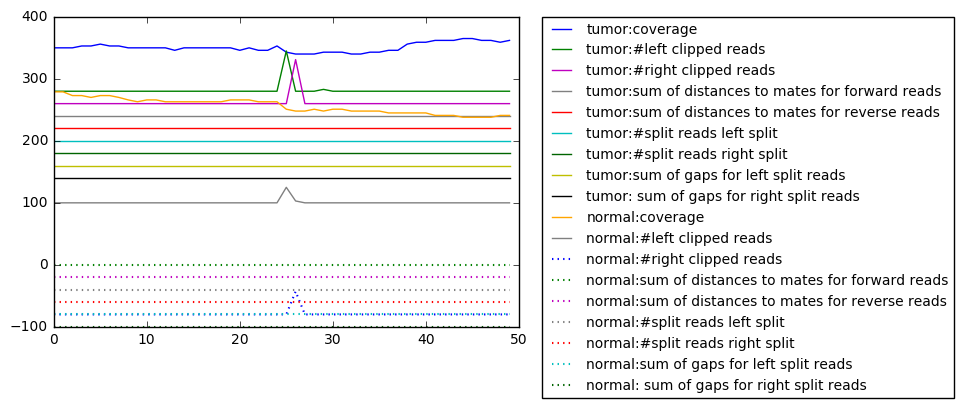

INS_pos id: 8000
id: 8000


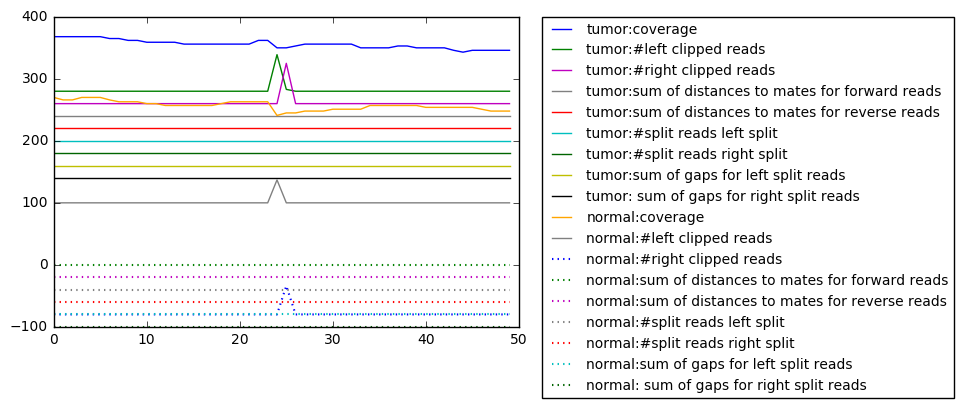

INS_pos id: 8005
id: 8005


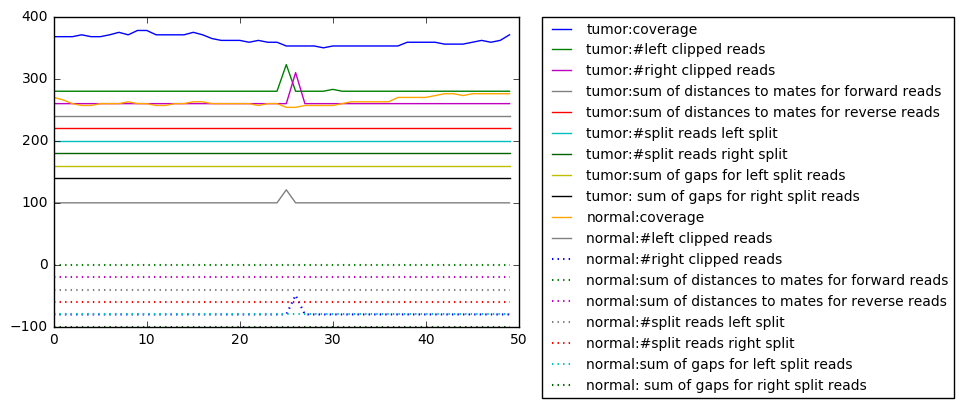

INS_pos id: 8010
id: 8010


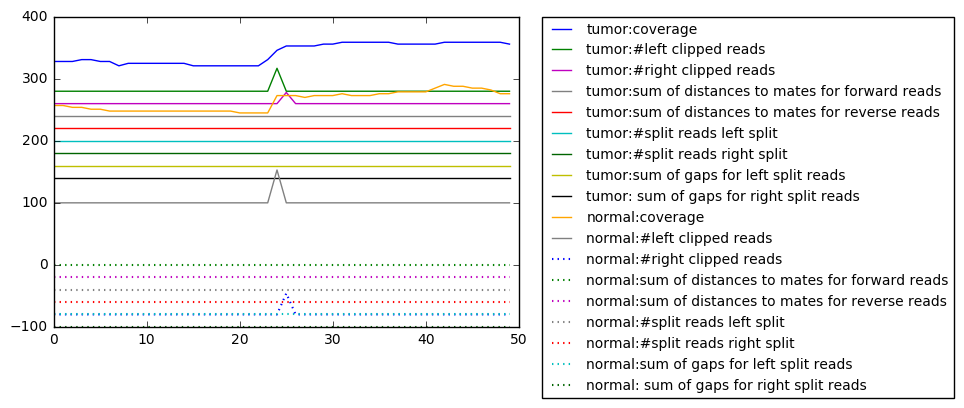

In [52]:
start_window =7985
plot_channels(start_window, n_windows)

## Plots several windows from the somatic SV category

INS_pos id: 19990
id: 19990


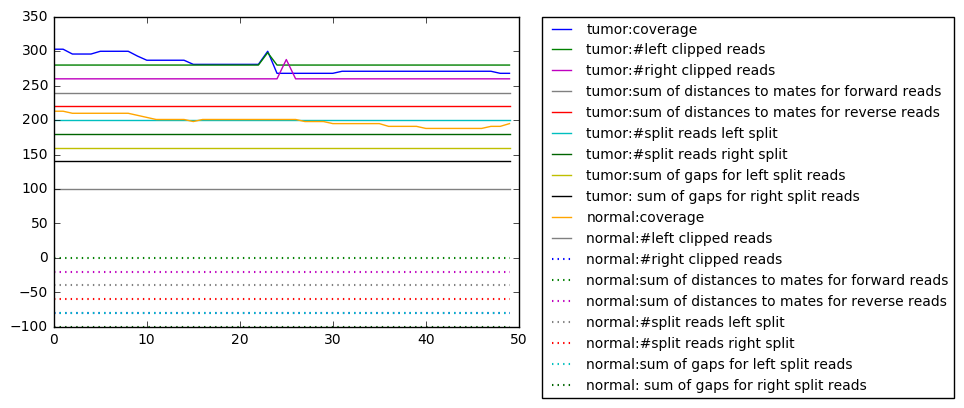

INS_pos id: 19995
id: 19995


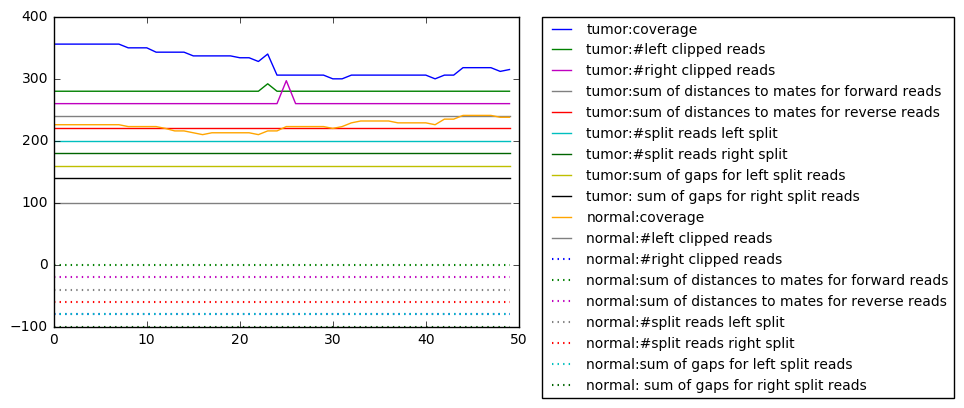

INS_pos id: 20000
id: 20000


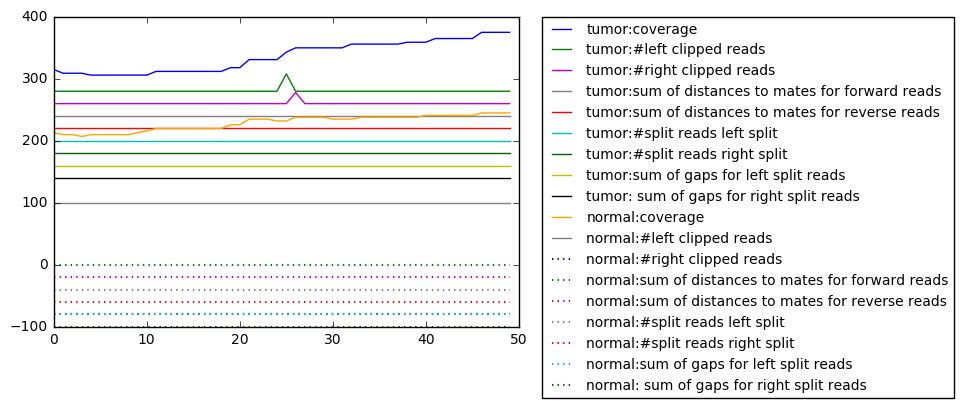

INS_pos id: 20005
id: 20005


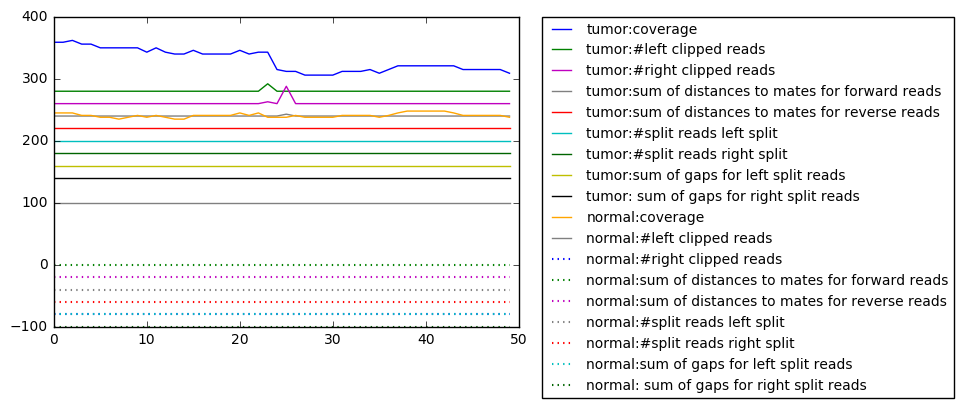

INS_pos id: 20010
id: 20010


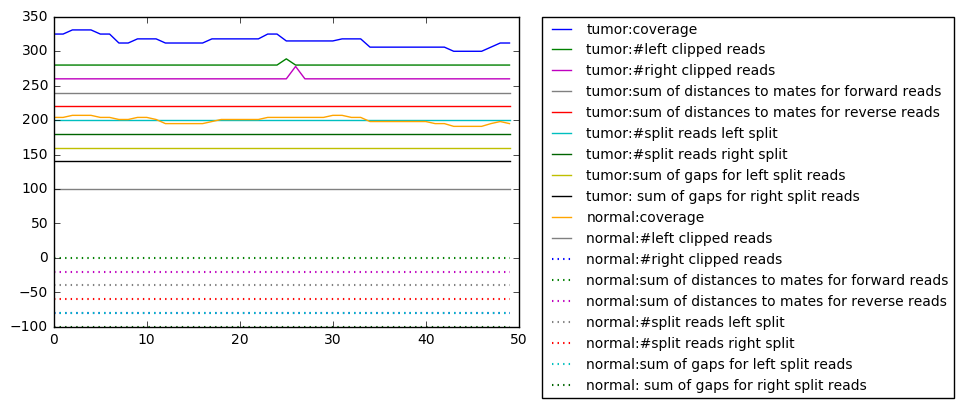

INS_pos id: 20015
id: 20015


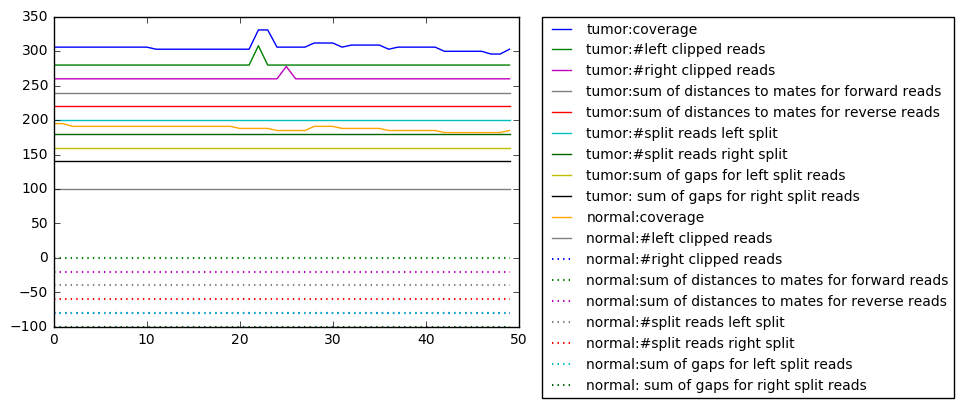

In [53]:

start_window = 3990+16000

plot_channels(start_window, n_windows)

INS_pos id: 23990
id: 23990


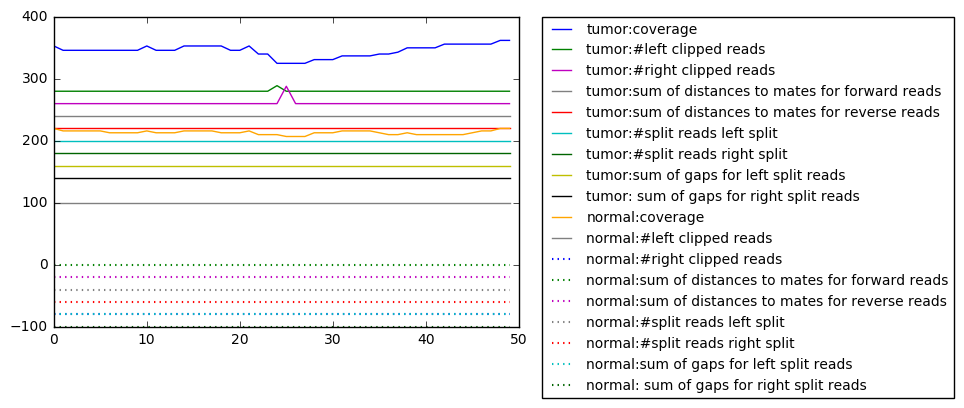

INS_pos id: 23995
id: 23995


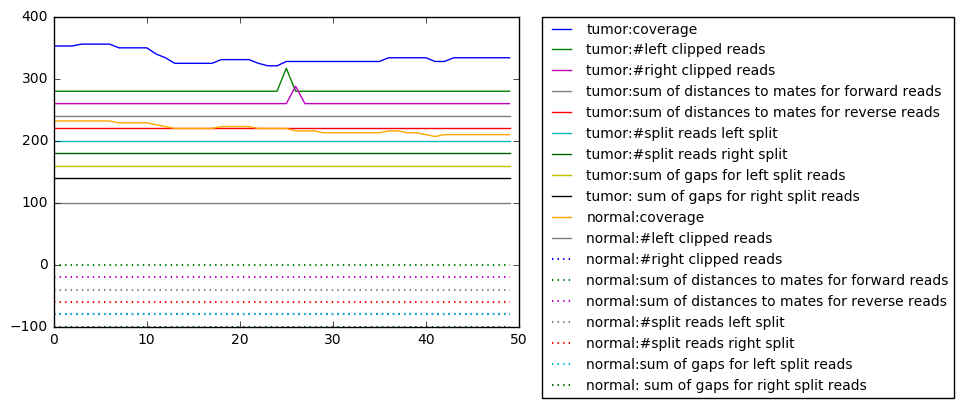

noSV id: 24000
id: 24000


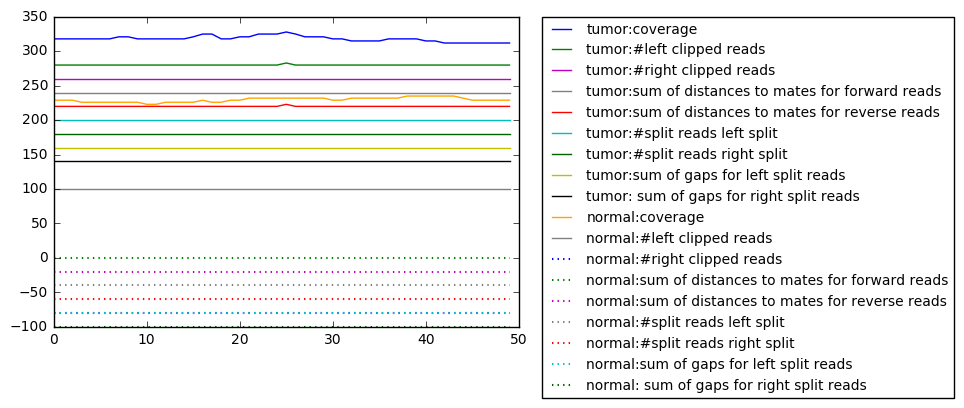

noSV id: 24005
id: 24005


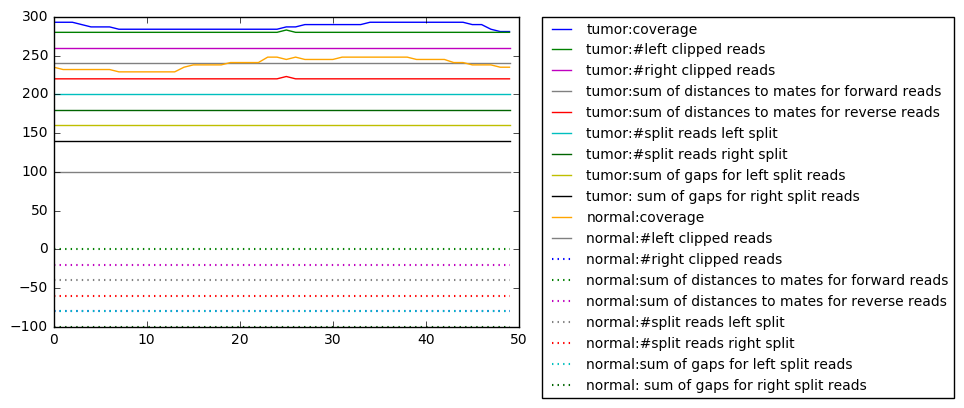

noSV id: 24010
id: 24010


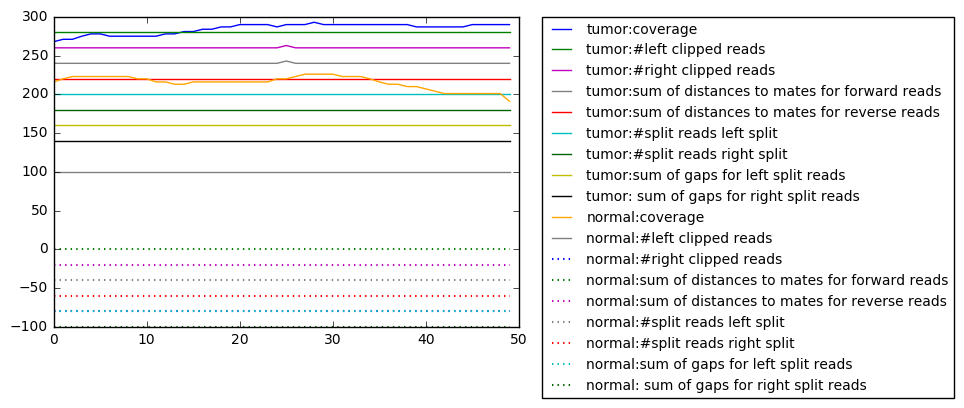

noSV id: 24015
id: 24015


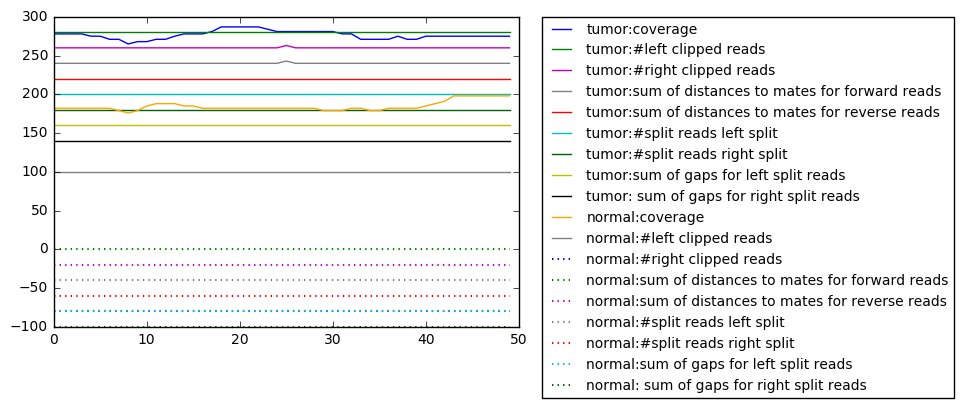

In [54]:
start_window = 7990+16000
plot_channels(start_window, n_windows)

## Plots several windows from the no SV category¶

noSV id: 30000
id: 30000


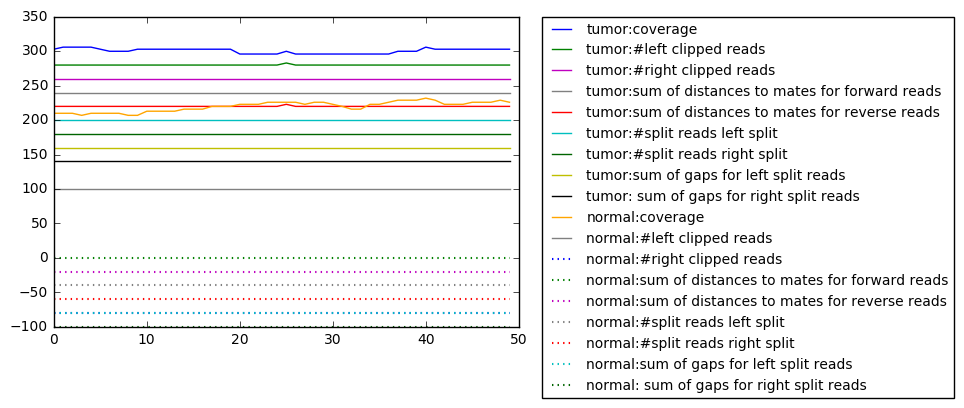

noSV id: 30005
id: 30005


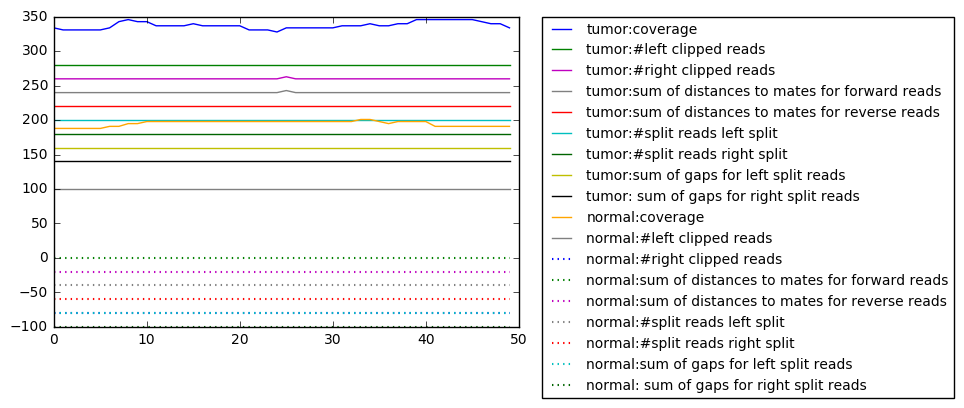

noSV id: 30010
id: 30010


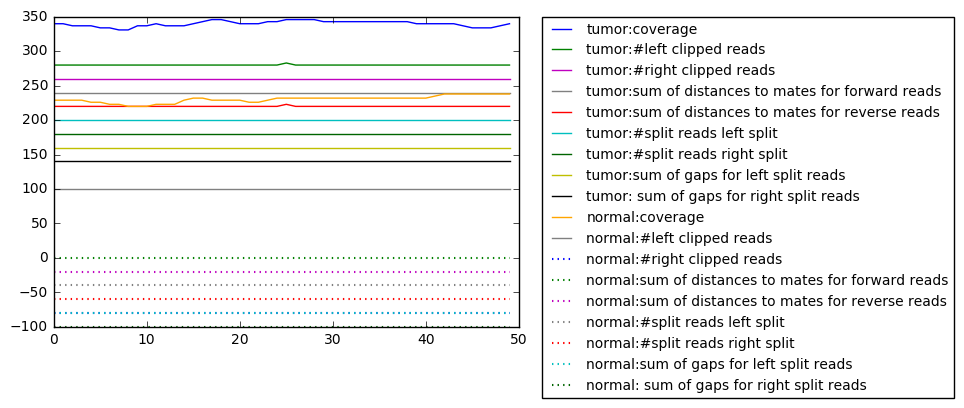

noSV id: 30015
id: 30015


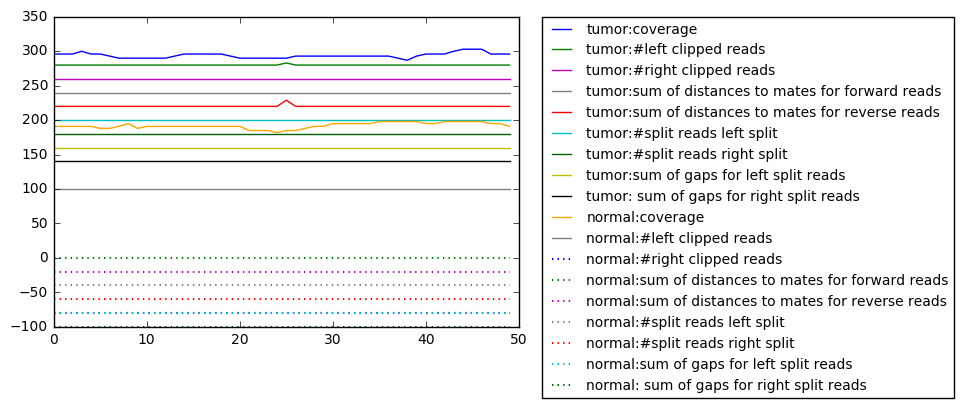

noSV id: 30020
id: 30020


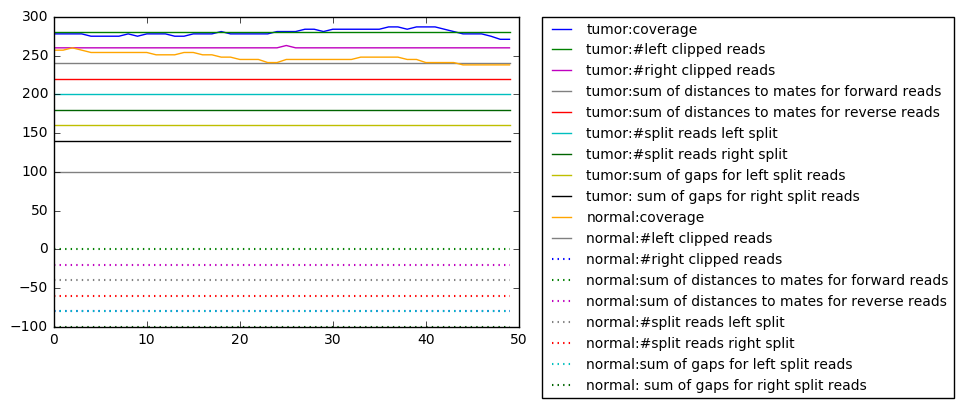

noSV id: 30025
id: 30025


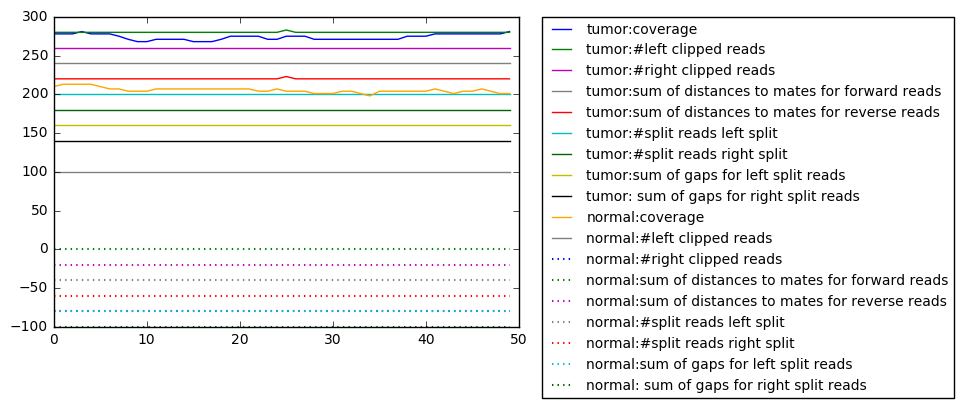

In [56]:
start_window = 30000
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [57]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

18


## Prepare the labels in McFly format

In [58]:
classlabels = list(set(y_train))
mapclasses = {classlabels[i] : i for i in range(len(classlabels))}
print(mapclasses)

y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

{'DEL_start': 0, 'INS_pos': 1, 'DEL_end': 2, 'noSV': 3}


In [59]:
y_test_binary

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

In [60]:
y_val_binary

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

In [61]:
X_train.shape

(36000, 50, 18)

## Generate neural networks architectures

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [63]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

In [64]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_fc_nodes=10, 
                                  cnn_max_fc_nodes=10,
                                  low_lr=4, high_lr=4)

Wall time: 669 ms


In [65]:
%%time
for model, params, model_types in models:
    print(params)
    model.summary()

{'filters': array([48]), 'fc_hidden_nodes': 10, 'learning_rate': 0.0001, 'regularization_rate': 0.06791002099318882}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 50, 18)            72        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 48)            2640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 48)            192       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 48)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                24010     
_________________________

## Train the networks

In [66]:
train_set_size = X_train.shape[0]
train_set_size

36000

In [69]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=5, 
                                                                                  subset_size=train_set_size,
                                                                                  verbose=True)

Training model 0 CNN
Train on 36000 samples, validate on 12000 samples
Epoch 1/5
36000/36000 [==============================] - 16s 447us/step - loss: 0.1295 - acc: 0.9939 - val_loss: 0.1603 - val_acc: 0.9892
Epoch 2/5
36000/36000 [==============================] - 16s 452us/step - loss: 0.1055 - acc: 0.9948 - val_loss: 0.0957 - val_acc: 0.9952
Epoch 3/5
36000/36000 [==============================] - 16s 457us/step - loss: 0.0878 - acc: 0.9950 - val_loss: 0.1196 - val_acc: 0.9956
Epoch 4/5
36000/36000 [==============================] - 16s 454us/step - loss: 0.0744 - acc: 0.9959 - val_loss: 0.0802 - val_acc: 0.9959
Epoch 5/5
36000/36000 [==============================] - 16s 455us/step - loss: 0.0681 - acc: 0.9952 - val_loss: 0.0616 - val_acc: 0.9964
Wall time: 1min 21s


## Plot training process

Currently run with a very low number of epochs

Wall time: 95.6 ms


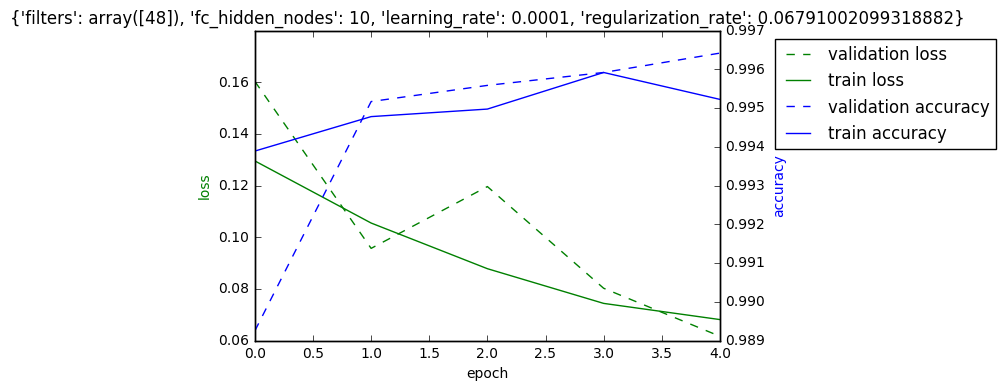

In [70]:
%%time
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [71]:
#%%time
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,train_acc,train_loss,val_acc,val_loss
0,"{'filters': array([48]), 'fc_hidden_nodes': 10...",0.995222,0.068102,0.996417,0.061632


## Take the best current model 

In [72]:
best_model_index = np.argmax(val_accuracies)

In [73]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'filters': array([48]), 'fc_hidden_nodes': 10, 'learning_rate': 0.0001, 'regularization_rate': 0.06791002099318882}


## Save the best current model

In [74]:
from keras.models import load_model

model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_230418')

best_model.save(model_path)

## Reload the best current model

In [104]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_230418')
model_reloaded = load_model(model_path)

## Inspect model predictions on test data

datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=1)

## Columns are predicted, rows are truth

In [108]:
labels =['DEL_start', 'INS_pos', 'DEL_end', 'noSV']
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

,DEL_start,INS_pos,DEL_end,noSV
DEL_start,1718,0,0,5
INS_pos,6,3979,2,3
DEL_end,0,8,1679,4
noSV,0,0,0,4717


## Test best current model on testset

### Overall accuracy on the test set:

In [99]:
%%time
score_test = model_reloaded.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [0.046159183062971371, 0.99752495668674201]
Wall time: 1.85 s


### Re-check the train and validation scores: 

In [77]:
best_model.get_config()[0]

{'class_name': 'BatchNormalization',
 'config': {'axis': -1,
  'batch_input_shape': (None, 50, 18),
  'beta_constraint': None,
  'beta_initializer': {'class_name': 'Zeros', 'config': {}},
  'beta_regularizer': None,
  'center': True,
  'dtype': 'float32',
  'epsilon': 0.001,
  'gamma_constraint': None,
  'gamma_initializer': {'class_name': 'Ones', 'config': {}},
  'gamma_regularizer': None,
  'momentum': 0.99,
  'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
  'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
  'name': 'batch_normalization_1',
  'scale': True,
  'trainable': True}}

In [78]:
score_train = model_reloaded.evaluate(X_train, y_train_binary, verbose=False)
print('Train Score of best model: ' + str(score_train))

Train Score of best model: [0.063390912291076448, 0.99658333333333338]


In [79]:
score_val = model_reloaded.evaluate(X_val, y_val_binary, verbose=False)
print('Val Score of best model: ' + str(score_val))

Val Score of best model: [0.061632467597723006, 0.99641666666666662]
